In [8]:
from nltk import word_tokenize, pos_tag, ne_chunk

In [3]:
sentence="홍길동이는 오늘 멀티캠퍼스에 지각했습니다"
pos_tag(word_tokenize(sentence)) #토큰화, 품사태깅

[('홍길동이는', 'JJ'), ('오늘', 'NNP'), ('멀티캠퍼스에', 'NNP'), ('지각했습니다', 'NN')]

In [13]:
sentence="James is working at Samsung in Suwon"
sentence=pos_tag(word_tokenize(sentence))
print(sentence)

[('James', 'NNP'), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), ('Samsung', 'NNP'), ('in', 'IN'), ('Suwon', 'NNP')]


In [14]:
ne_chunk(sentence) #개체 유형 출력

LookupError: 

===========================================================================
NLTK was unable to find the gs file!
Use software specific configuration paramaters or set the PATH environment variable.
===========================================================================

Tree('S', [Tree('PERSON', [('James', 'NNP')]), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), Tree('ORGANIZATION', [('Samsung', 'NNP')]), ('in', 'IN'), Tree('GPE', [('Suwon', 'NNP')])])

In [15]:
from keras.datasets import reuters

In [25]:
(xtrain, ytrain), (xtest, ytest)=reuters.load_data(num_words=None, test_split=0.2)
#num_words=1000은 1000등 안에 있는 단어들만 가져와라

In [28]:
len(xtrain) #8982개의 뉴스기사
xtrain[0]
len(xtest)
#단어들의 빈도에 따라 인덱스가 부여가 된 상태임
#1 => 등장 빈도수가 1등
#27595 => 등장 빈도수가 27595등
#ex) The ... ...

2246

In [32]:
len(ytrain)
#xtrain[0]

8982

In [37]:
max(ytrain)+1 #46개 카테고리

46

In [41]:
len(xtrain) #8982
len(xtest) #2246
num_classes=max(ytrain)+1
num_classes #카테고리 수

46

In [47]:
print(max(len(line) for line in xtrain)) #최대 뉴스기사 길이(2376)
#sum(map(len, xtrain))   #  전체 뉴스기사 단어 개수
sum(map(len, xtrain)) /len(xtrain) #평균 뉴스기사 길이 145

2376


145.5398574927633

(array([2.292e+03, 2.917e+03, 1.098e+03, 8.240e+02, 4.880e+02, 3.410e+02,
        2.480e+02, 1.640e+02, 1.160e+02, 1.180e+02, 7.600e+01, 5.900e+01,
        6.400e+01, 4.300e+01, 4.700e+01, 2.800e+01, 2.500e+01, 1.500e+01,
        1.000e+01, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  13.  ,   60.26,  107.52,  154.78,  202.04,  249.3 ,  296.56,
         343.82,  391.08,  438.34,  485.6 ,  532.86,  580.12,  627.38,
         674.64,  721.9 ,  769.16,  816.42,  863.68,  910.94,  958.2 ,
        1005.46, 1052.72, 1099.98, 1147.24, 1194.5 , 1241.76, 1289.02,
        1336.28, 1383.54, 1430.8 , 1478.06, 1525.32, 1572.58, 1619.84,
        1667.1 , 1714

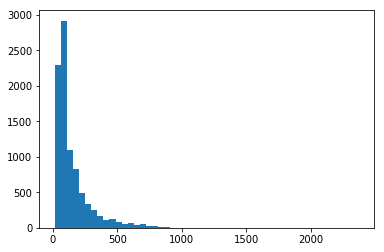

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist([len(s) for s  in xtrain], bins=50)

In [50]:
import seaborn as sns

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


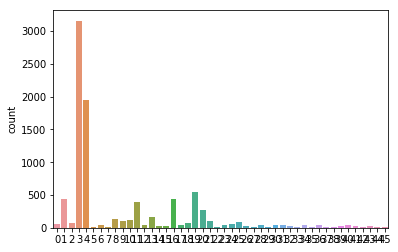

In [51]:
sns.countplot(ytrain)

In [52]:
import numpy  as np

In [61]:
unique_elements, counts_elements=np.unique(ytrain, return_counts=True)
unique_elements
counts_elements
dict(zip(unique_elements, counts_elements))
#np.asarray((unique_elements,counts_elements))

{0: 55,
 1: 432,
 2: 74,
 3: 3159,
 4: 1949,
 5: 17,
 6: 48,
 7: 16,
 8: 139,
 9: 101,
 10: 124,
 11: 390,
 12: 49,
 13: 172,
 14: 26,
 15: 20,
 16: 444,
 17: 39,
 18: 66,
 19: 549,
 20: 269,
 21: 100,
 22: 15,
 23: 41,
 24: 62,
 25: 92,
 26: 24,
 27: 15,
 28: 48,
 29: 19,
 30: 45,
 31: 39,
 32: 32,
 33: 11,
 34: 50,
 35: 10,
 36: 49,
 37: 19,
 38: 19,
 39: 24,
 40: 36,
 41: 30,
 42: 13,
 43: 21,
 44: 12,
 45: 18}

In [62]:
word_index=reuters.get_word_index()
word_index

557056/550378 [==============================] - 1s 1us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [63]:
index_to_word={}
for key, value in word_index.items():
    index_to_word[value]=key

In [69]:
index_to_word[2]

'of'

In [76]:
print(' '.join([index_to_word[x] for x in xtrain[0]]))

the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


In [79]:
#lstm 뉴스 분류
(xtrain, ytrain), (xtest,ytest)=reuters.load_data(num_words=1000, test_split=0.2)
#단어 등장 빈도수가 1000등 안에 있는 단어들 대상
max_len=100 #100개
#단어 개수가 100개 넘으면 100개 저장, 부족하면 0으로 채우자

from keras.preprocessing import sequence
xtrain=sequence.pad_sequences(xtrain, maxlen=max_len)
xtest=sequence.pad_sequences(xtest, maxlen=max_len)

In [82]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils


In [84]:
ytrain=np_utils.to_categorical(ytrain)
ytrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [85]:
ytest=np_utils.to_categorical(ytest)
ytest

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [87]:
model=Sequential()
model.add(Embedding(1000, 128))
#               (단어벡터수, 임베딩 벡터의 차원)
model.add(LSTM(128))
model.add(Dense(46, activation='softmax'))

In [88]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

W0828 11:54:22.067310  9836 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0828 11:54:22.087257  9836 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [89]:
history=model.fit(xtrain,ytrain, batch_size=100, epochs=20, validation_data=(xtest, ytest))

W0828 11:55:46.044373  9836 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0828 11:55:46.529526  9836 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 17s 2ms/step - loss: 2.5528 - acc: 0.3658 - val_loss: 2.1732 - val_acc: 0.4822
Epoch 2/20
8982/8982 [==============================] - 15s 2ms/step - loss: 2.0350 - acc: 0.5032 - val_loss: 1.9775 - val_acc: 0.5249
Epoch 3/20
8982/8982 [==============================] - 15s 2ms/step - loss: 1.8952 - acc: 0.5287 - val_loss: 1.7876 - val_acc: 0.5548
Epoch 4/20
8982/8982 [==============================] - 15s 2ms/step - loss: 1.7154 - acc: 0.5661 - val_loss: 1.7118 - val_acc: 0.5646
Epoch 5/20
8982/8982 [==============================] - 16s 2ms/step - loss: 1.6451 - acc: 0.5821 - val_loss: 1.6959 - val_acc: 0.5628
Epoch 6/20
8982/8982 [==============================] - 16s 2ms/step - loss: 1.5811 - acc: 0.5963 - val_loss: 1.6012 - val_acc: 0.6069
Epoch 7/20
8982/8982 [==============================] - 15s 2ms/step - loss: 1.4953 - acc: 0.6177 - val_loss: 1.5544 - val_acc: 0.6060
Epoch 8

In [90]:
print("테스트 정확도: ", model.evaluate(xtest, ytest)[1])


2246/2246 [==============================] - 1s 388us/step
테스트 정확도:  0.7208370436862018


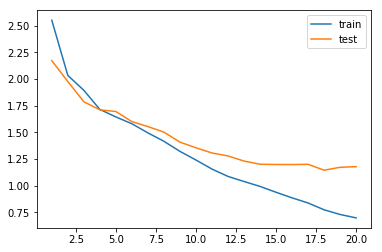

In [94]:
epochs=range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.legend(['train','test'], loc='upper right')
plt.show()

In [142]:
import pandas as pd
trainData=pd.read_table('ratings_train.txt')
testData=pd.read_table('ratings_test.txt')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [143]:
len(testData)

50000

In [144]:
testData

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
5,7898805,"음악이 주가 된, 최고의 음악영화",1
6,6315043,진정한 쓰레기,0
7,6097171,"마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다",0
8,8932678,갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한c...,0
9,6242223,"이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..",1


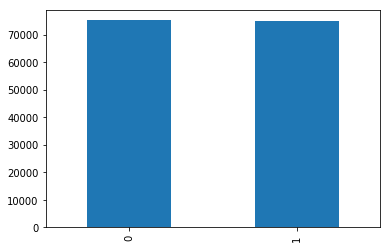

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
trainData['label'].value_counts().plot(kind='bar')

In [146]:
#trainData.groupby('label').size()
trainData.groupby('label').size().reset_index(name='count')

,label,count
0,0,75173
1,1,74827


In [147]:
#리뷰 중에 null이 있는지 확인?
trainData.isnull().values.any()

True

In [148]:
#컬럼 단위로 null 개수
trainData.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [149]:
#리뷰가 null인 데이터 출력
trainData[trainData.document.isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [150]:
trainData=trainData.dropna(how='any') #null값이 있는 행 제거
trainData[trainData.document.isnull()]
len(trainData)

149995

In [151]:
#1. 영어 제거(정규표현식) -> [a-zA-Z], sub, replace
import re
text="do!! you expec... To ~ read~, ~!! ??@"
#공백,영문자를 제외하고 모두 제거
#re.sub(정규식,바꿀려고하는문자,text)
re.sub('[^a-zA-Z ]','', text)

'do you expec To  read  '

In [152]:
# ㄱ~ㅎ:유니코드
# ㅏ~ㅣ:유니코드  
trainData['document']=trainData['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
#trainData['document']
trainData[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [153]:
import konlpy
from konlpy.tag import Okt #Twitter
okt=Okt()
okt.morphs("포스터보고 초딩영화줄오버연기조차 가볍지 않구나")

['포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍지', '않구나']

In [165]:
okt.morphs("포스터보고 초딩영화줄오버연기조차 가볍지 않구나",stem=True)

['포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다']

In [166]:
stopwords=['의','가','이','은','하다','한','와','에','으로','자',
          '과','도','걍','잘','좀','는','들','을','를', '것','나']

In [167]:
okt.morphs("에이 이런 것도 영화냐? 차라리 집에서 티브이나 보겠다", stem=True)

['에이', '이렇다', '것', '도', '영화', '냐', '?', '차라리', '집', '에서', '티브이', '나', '보다']

In [168]:
xtrain=[]
for sentence in trainData['document']:
    tempx=[]
    tempx=okt.morphs(sentence, stem=True)
    tempx=[word for word in tempx if not word in stopwords]
    xtrain.append(tempx)
    

In [169]:
#test 데이터에 대해서도 동일한 전처리 과정 수행
testData=testData.dropna(how='any') #null값이 있는 행 제거
testData[testData.document.isnull()]
testData['document']=testData['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

xtest=[]
for sentence in testData['document']:
    tempx=[]
    tempx=okt.morphs(sentence, stem=True)
    tempx=[word for word in tempx if not word in stopwords]
    xtest.append(tempx)



In [170]:
#
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=30000)
tokenizer.fit_on_texts(xtrain)
xtrain=tokenizer.texts_to_sequences(xtrain)
xtest=tokenizer.texts_to_sequences(xtest)

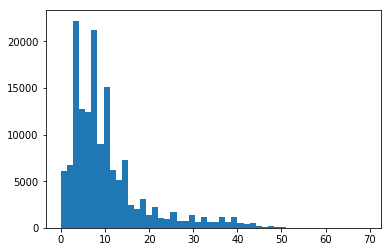

In [171]:
#리뷰 단어 최대 길이
#리뷰 평균 길이

max(len(line) for line in xtrain) #리뷰 최대 길이
sum(map(len, xtrain)) / len(xtrain) #평균 길이
#시각화 확인
plt.hist([len(s) for s in xtrain], bins=50)
plt.show()


#LSTM 영화 리뷰 감성 분석기 제작